In [1]:
#Example Problem-RandomForest-BlueorRed

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score,recall_score
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("D:/WORK/Great Lakes/5th Term/PAM/Class 4")

In [4]:
#Reading the file
mydata=pd.read_csv("BlueorRed.csv")
mydata.head()

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [5]:
Y=mydata["Undecided"]
X=mydata.iloc[:,1:9]
print(mydata.head())

   Undecided  Age  HomeOwner  Female  Married  HouseholdSize  Income  \
0          1   51          1       1        1              4   171.0   
1          1   37          1       1        1              3    96.0   
2          1   53          1       1        1              6    86.0   
3          0   33          1       1        1              2   176.0   
4          0   46          1       1        1              6   420.0   

   Education  Church  
0         15       0  
1         18       0  
2         20       0  
3         18       1  
4         15       1  


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
X_train.shape

(7000, 8)

In [7]:
radom_clf=RandomForestClassifier(max_depth=20,n_estimators=10,random_state=2)
radom_clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=2)

In [8]:
prediction=radom_clf.predict(X_train)
prediction
print(prediction)
Prediction=pd.DataFrame(prediction)
Prediction=Prediction.iloc[:,1:9]

[1 1 0 ... 1 0 0]


In [9]:
pred_prob=radom_clf.predict_proba(X_train)
pred_prob=pd.DataFrame(pred_prob)
print(pred_prob)
pred_class=(pred_prob[1]>=0.5).astype(np.int)

        0    1
0     0.0  1.0
1     0.0  1.0
2     1.0  0.0
3     0.0  1.0
4     1.0  0.0
...   ...  ...
6995  0.0  1.0
6996  0.9  0.1
6997  0.2  0.8
6998  1.0  0.0
6999  1.0  0.0

[7000 rows x 2 columns]


<AxesSubplot:>

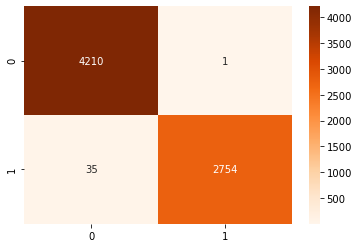

In [10]:
cm=confusion_matrix(Y_train,prediction)
sns.heatmap(cm,annot=True,cmap="Oranges",fmt=".0f")

In [11]:
from sklearn.metrics import classification_report
Report=classification_report(Y_train,prediction)
print((Report))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4211
           1       1.00      0.99      0.99      2789

    accuracy                           0.99      7000
   macro avg       1.00      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [12]:
importances=radom_clf.feature_importances_
importances
importances=pd.DataFrame(importances)
Importance=importances.transpose()
Importance.columns=["Age","HomeOwner","Female","Married","HouseholdSize",
                    "Income","Education","Church"]
Importance

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,0.053015,0.012336,0.063384,0.004674,0.025684,0.147882,0.508932,0.184093


In [13]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{"n_estimators":[10,20],
                  "max_depth":range(10,20),
                   "max_features":["sqrt",0.2]}]
radom_clf=RandomForestClassifier()
clf=GridSearchCV(radom_clf,
                tuned_parameters,
                cv=10,
                scoring="roc_auc")
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(10, 20),
                          'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [14]:
clf.best_score_

0.9834289375898326

In [15]:
clf.best_params_

{'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 20}

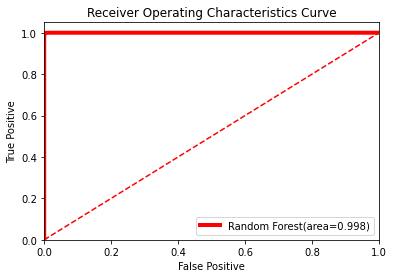

In [16]:
from sklearn.metrics import(roc_auc_score,roc_curve)
Y_train.head()
pred_class
rf_auc=roc_auc_score(Y_train.astype(int),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(int),pred_prob[1])
plt.figure()
plt.plot(fpr,tpr,label="Random Forest(area=%0.3f)" % rf_auc,lw=4,color="red")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()